# Titanic tutorial_ver2
https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
# matplotlib 다른 스타일
#plt.style.use('ggplot')

In [2]:
data=pd.read_csv('./train.csv')

## Part1: Exploratory Data Analysis(EDA)


### Types of Features
* Categorical Features -> Sex, Embarked
* Ordinal Features -> PClass
* Continuous Feature -> Age


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 데이터 null값 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

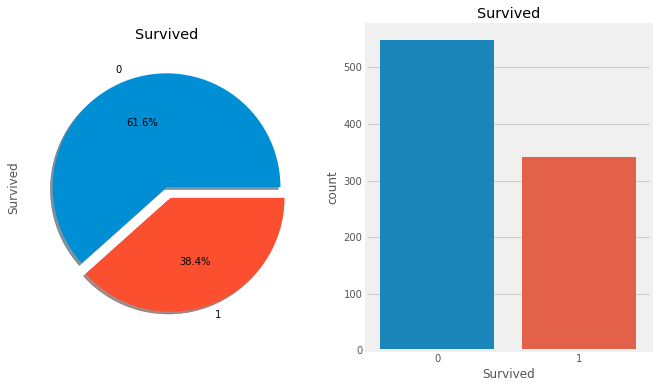

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Survived')
sns.countplot(data['Survived'], ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('count')
plt.show()

#### groupby(['A','B']) 
* A가 앞에오면 A를 기준으로 그룹핑, B가 앞에오면 B를 기준으로 그룹핑

In [23]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

#### groupby().mean() 
* 그룹핑 합계 대비 해당 값의 비율

In [44]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


* 남자의 생존률은 18-19%인데 비해 여자의 생존률은 약 75% 가까이 되는것을 확인.

-----------------------------------------------------------------------------------------------------------------------
### Sex ---> Categorical Feature

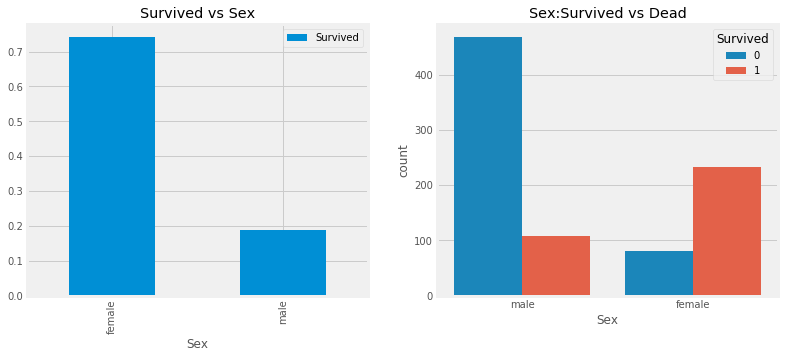

In [42]:
# Sex 별 생존률 그래프와 Sex 별 생존/사망 그래프
fig, ax = plt.subplots(1,2, figsize=(12,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data= data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

-----------------------------------------------------------------------------------------------------------------------
### Pclass ---> Ordinal Feature
* crosstab 활용

In [45]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


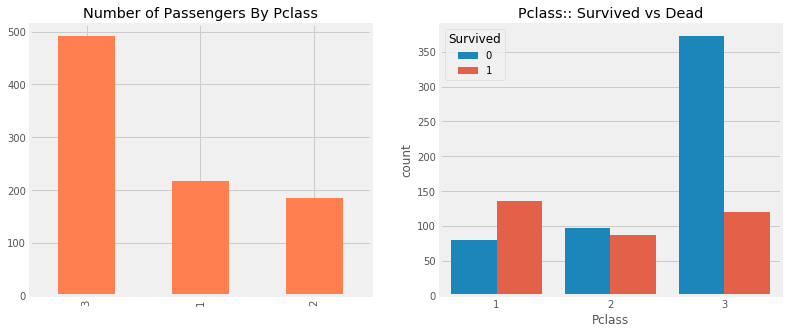

In [54]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
data['Pclass'].value_counts().plot.bar(color='coral', ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:: Survived vs Dead')
plt.show()

* PClass =1 인 경우에 생존자가 가장 많은 것을 확인할 수 있음.
* PClass=1 생존률은 약63%인데 비해, PClass=2는 47%, PClass=3은 24%에 불과하다.


#### Sex, Pclass 별 생존률 확인

In [57]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

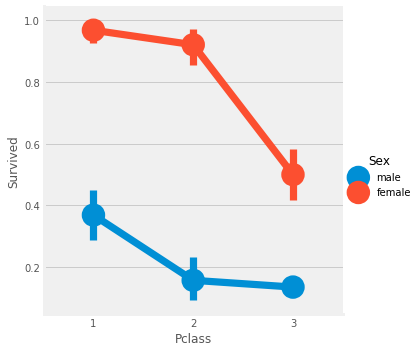

In [58]:
sns.factorplot('Pclass','Survived', hue='Sex', data=data)
plt.show()

* 이를 통해, Pclass1에 있던 여성들의 생존률은 95-96%인것을 알 수 있다. 
    * 94명 중 3명만 사망

-----------------------------------------------------------------------------------------------------------------------
### Age ---> Continous feature

In [61]:
print('Oldest Age:',data['Age'].max())
print('Youngest Age:',data['Age'].min())
print('Average Age:',data['Age'].mean())

Oldest Age: 80.0
Youngest Age: 0.42
Average Age: 29.69911764705882


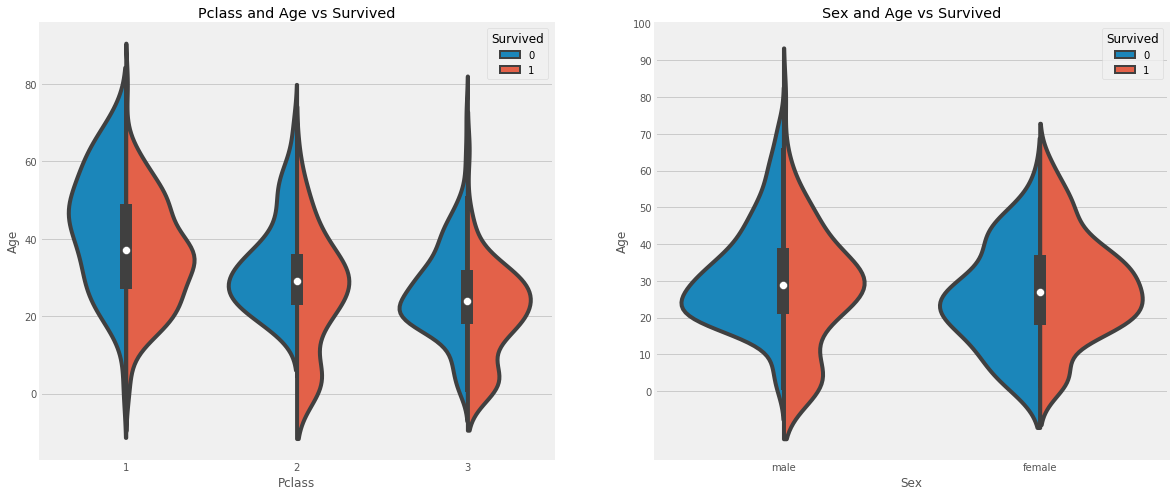

In [70]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived",data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))  # y축 범위설정 => set_yticks
plt.show()

* 아이들의 수는 Pclass가 클수록 많음
* 20-50세 승객의 생존률은 Pclass1에서 가장 높고, 여성이 더 많음.
* 남자는 나이가 들수록 생존률이 낮다.

#### Name 컬럼을 통해 Age 컬럼의 null값을 채울 수 있다.

In [75]:
data['Initial'] = 0
for i in data:
    data['Initial']= data.Name.str.extract('([A-Za-z]+)\.')

In [77]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [80]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [83]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [86]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### 위의 Initial별 평균 나이로 null값을 채운다.

In [98]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [100]:
# null값 없는것을 확인
data.Age.isnull().any()

False

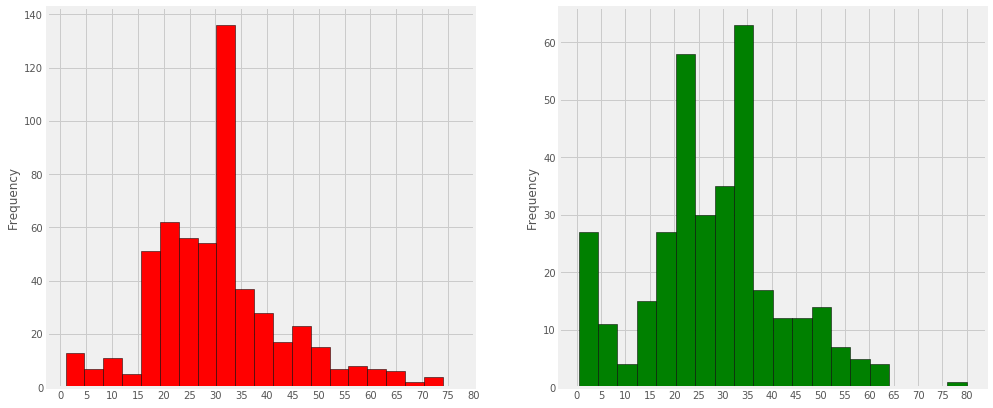

In [117]:
# 나이에 대한 히스토그램
fig, ax = plt.subplots(1,2, figsize=(15,7))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='black', color='red')
ax[0].set_xticks(list(range(0, 85, 5)))  # x축 값 범위
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_xticks(list(range(0,85,5)))
plt.show()

* 5살 미만 아기들은 많이 생존한 것을 확인.
* 최고령자 80세 생존한 것을 확인.
* 30-40세가 사망자가 가장 많음.

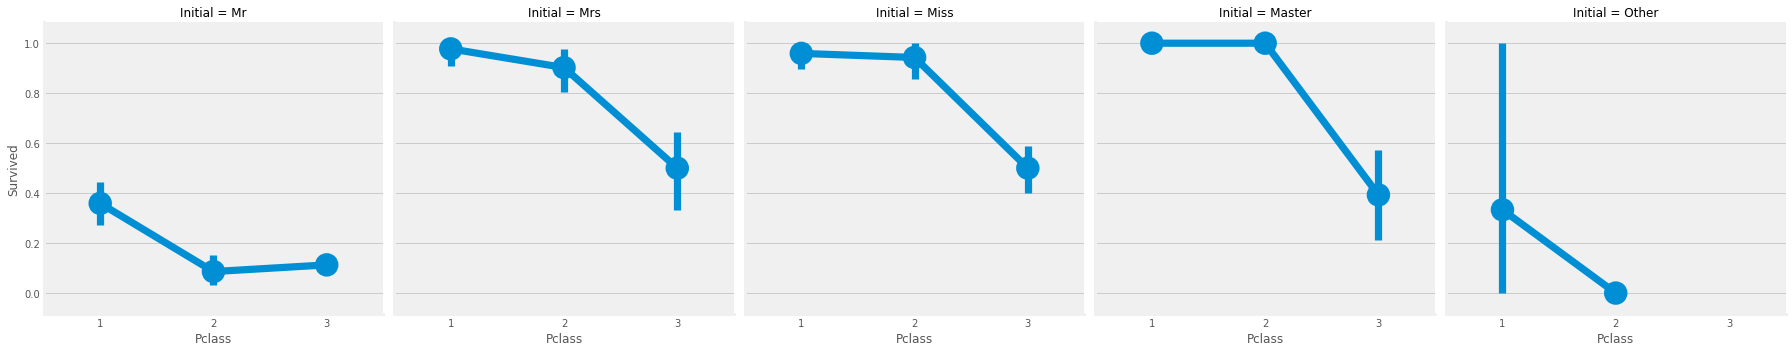

In [125]:
sns.factorplot('Pclass','Survived', col='Initial',data=data)
plt.show()

-----------------------------------------------------------------------------------------------------------------------
### Embarked ---> Categorical Value

In [133]:
pd.crosstab([data.Embarked,data.Pclass], [data.Sex,data.Survived], margins=True).style.background_gradient(cmap='summer_r')

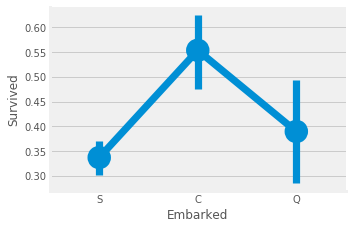

In [137]:
sns.factorplot('Embarked','Survived', data=data)
fig=plt.gcf()  # figure 객체를 얻으려면 gcf 명령어 사용
fig.set_size_inches(5,3)  # 그래프 크기변경
plt.show()

* C에서의 생존률이 약 0.55로 가장 높고, S에서의 생존률이 가장 낮다.

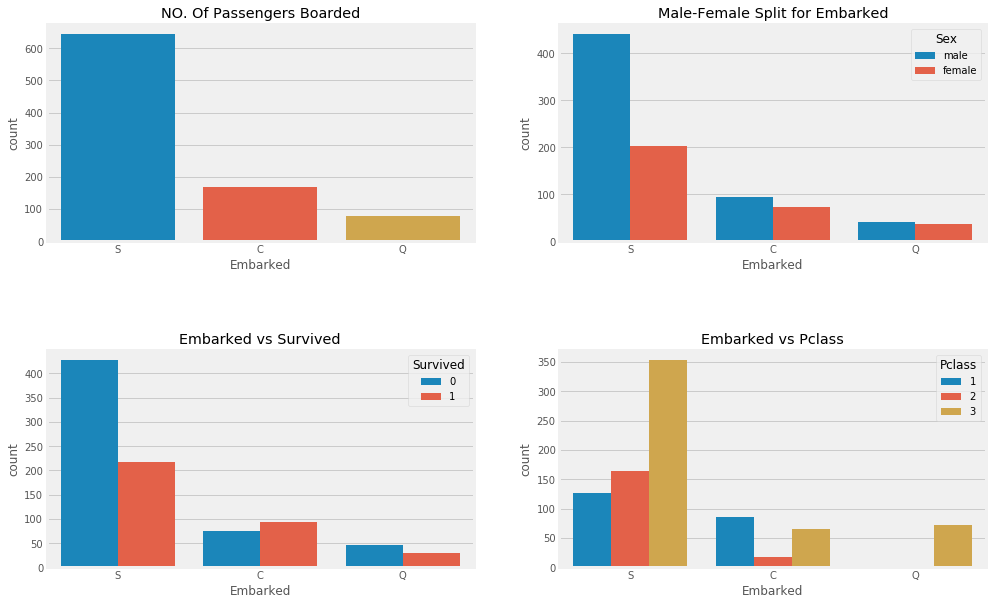

In [143]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('NO. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)   # 그래프간 간격 조정
plt.show()

* S에서 승객이 가장 많이 탑승했고, 그들중 대부분은 Pclass=3임.
* C에서 탑승한 승객들의 생존률이 가장 높은데, 그 이유로는 C 탑승 승객들중 Pclass=1 이 상당수임.
* S에서 Pclass=1 탑승객이 많은 것으로 보아 부유한 사람들이 많은 것 같은데, 생존률은 낮은 이유는 Pclass=3 인 탑승객이 상당히 많기 때문에 이들이 대부분 사망했기 때문
* Q의 승객들은 거의 다 Pclass=3임.

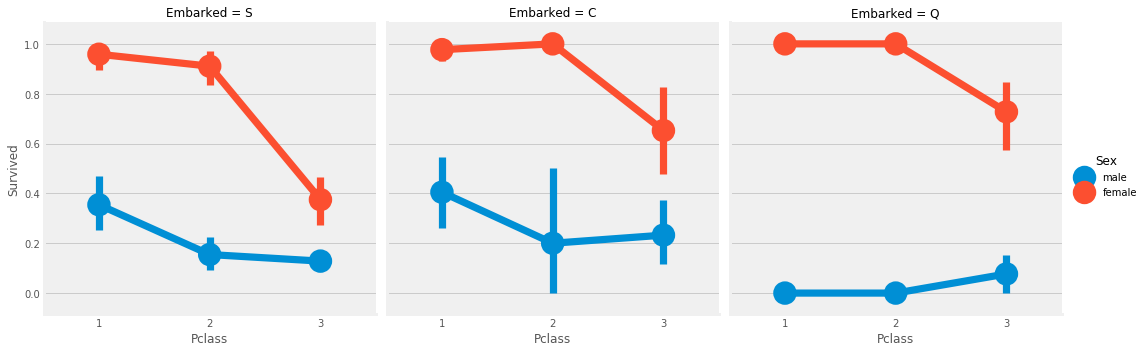

In [150]:
sns.factorplot('Pclass','Survived', col='Embarked',hue='Sex',data=data)
plt.show()

* Pclass=1과 Pclass=2 에서는 여성들의 생존률이 거의 1에 가까움
* S항구에서 Pclass=3인 탑승객은 남,여 모두 생존률이 낮음.
* Q항구에서 남자는 대부분 다 생존률이 낮음.

#### S항구에서 탑승객이 가장 많으므로, Embarked에 null값은 'S'로 채운다.

In [166]:
data['Embarked'].fillna('S', inplace=True)

In [168]:
data.Embarked.isnull().any()

False

-----------------------------
### SibSip ---> Discrete Feature

In [172]:
pd.crosstab([data.SibSp], data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


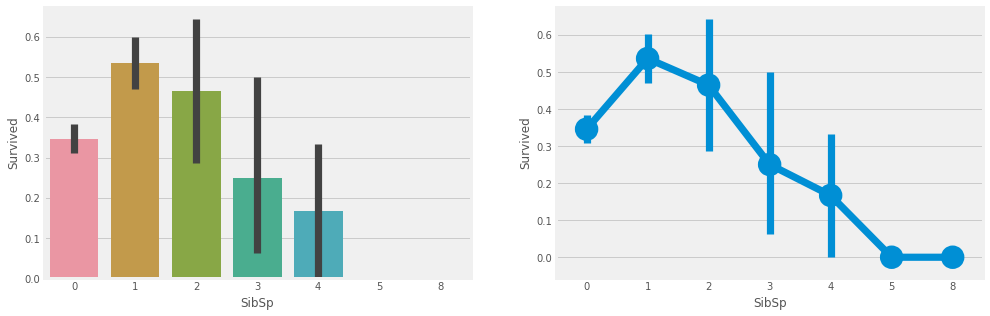

In [184]:
f, ax= plt.subplots(1,2, figsize=(15,5))
sns.barplot('SibSp','Survived', data=data, ax=ax[0])
sns.factorplot('SibSp','Survived', data=data, ax=ax[1])
plt.close(2)
plt.show()

In [187]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


* sibling이 없고, 혼자인 탑승객은 34.5%의 생존률로 살아남았고
* 가족수가 늘어날수록 생존률은 줄어든다.
    * Sibsp 수가 3보다 큰 경우는 전부 Pclass3이다.

### Parch

In [188]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


* 보이는것 처럼, 가족이 많을수록 Pclass3이다.

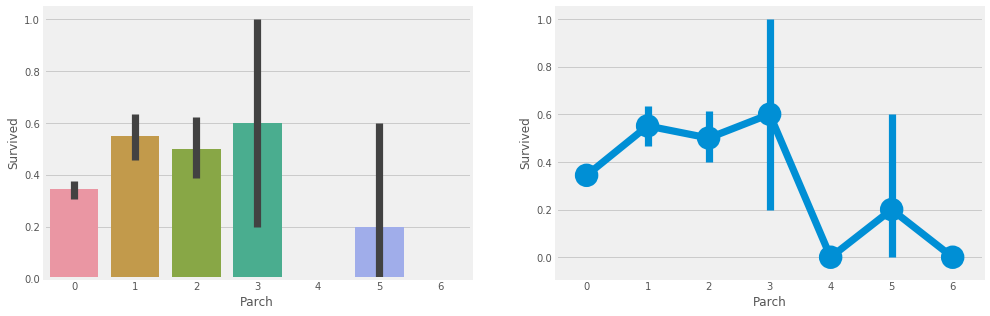

In [189]:
f, ax= plt.subplots(1,2, figsize=(15,5))
sns.barplot('Parch','Survived', data=data, ax=ax[0])
sns.factorplot('Parch','Survived', data=data, ax=ax[1])
plt.close(2)
plt.show()

* 가족이 3명인 경우 생존률이 가장 높고, 너무 적거나 많아도 생존률이 떨어짐.

----------------------------------
### Fare ---> Continuous Feature

In [190]:
print('Highest Fare:',data['Fare'].max())
print('Lowest Fare:',data['Fare'].min())
print('Average Fare:',data['Fare'].mean())

Highest Fare: 512.3292
Lowest Fare: 0.0
Average Fare: 32.2042079685746


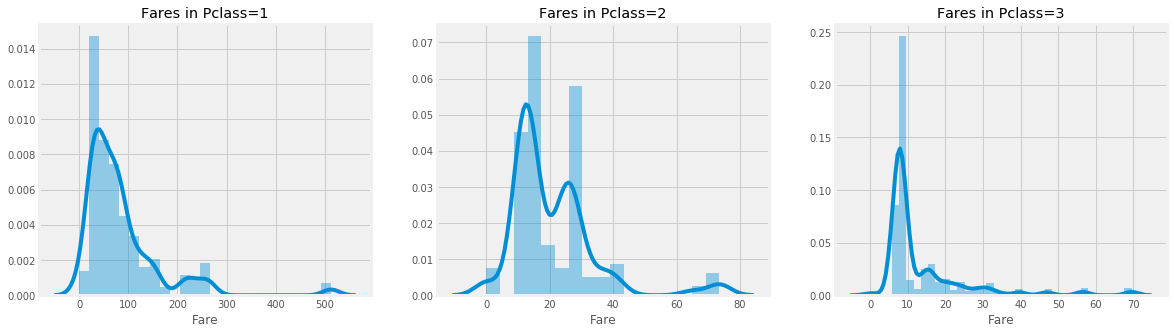

In [196]:
# Pclass=1,2,3 일때 각각의 Fare plot
fig, ax = plt.subplots(1,3, figsize=(18,5))
sns.distplot(data[data.Pclass==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass=1')
sns.distplot(data[data.Pclass==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass=2')
sns.distplot(data[data.Pclass==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass=3')
plt.show()

* Pclass1에서의 Fares분포가 지나치게 치우쳐 있음. 

#### Feature 들 간의 상관관계

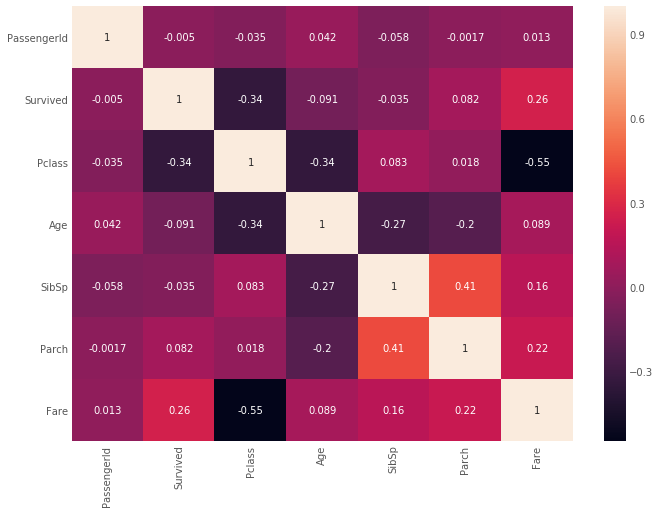

In [202]:
sns.heatmap(data.corr(), annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* 지나치게 상관관계가 높은 feature들은 둘중 하나는 제거하는게 좋을 수 있다.
* 위 히트맵에서는 SibSp 와 Parch 가 0.41로 가장 높은 상관관계를 보인다. 

----------------------------------------------------------------------------------------------
## Part2: Feature Engineering and Data Cleaning